# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [3]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chip, Mr. Chang",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [6]:
print("Missing values for each column :\n", titanic.isnull().sum())

Missing values for each column :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [7]:
# 1. impute the missing values of Age with mean
titanic.fillna(value={'Age':titanic['Age'].mean(),'mass':0,'orbital_period':0},inplace=True)

# 2. impute the missing values of Cabin with 'other'
titanic.fillna(value={'Cabin':'other'},inplace=True)

# 3. impute the missing values of Embarked with mode
titanic.fillna(value={'Embarked':titanic['Embarked'].mode()[0]},inplace=True)

# check the null values again
print("Missing values for each column :\n", titanic.isnull().sum())

Missing values for each column :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [8]:

#print("Missing values for each column :\n", titanic.isnull().sum())

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [9]:
# find the name of the person paid the 16th highest fee for the ticket
display(titanic.sort_values('Fare', ascending=False).iloc[15, 3])

'Farthing, Mr. John'

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [10]:
display(titanic.loc[titanic['Sex'] == 'female', :].sort_values('Fare', ascending=False).iloc[5, 3])

'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [77]:
# percentage of survival amaong survivors
survived_titantic = titanic.loc[titanic['Survived'] == 1, :]  # screened survival data
tmp = pd.pivot_table(survived_titantic,index=['Sex', 'Pclass'], values=['Age'], aggfunc={'Age': 'count',},  margins = True)
tmp['% Age'] = (tmp['Age']/tmp['Age'].sum())*2*100
tmp.rename(columns={'Age': 'Count'})
print(tmp)

               Age       % Age
Sex    Pclass                 
female 1        91   26.608187
       2        70   20.467836
       3        72   21.052632
male   1        45   13.157895
       2        17    4.970760
       3        47   13.742690
All            342  100.000000


**Findings:**
Females are significantly more likely to survive than males, and people in better classes are more likely to survive than in worse classes. 
While the survival rate for males in class 3 is surprisingly higher than those in class 1 and 2.

In [72]:
pd.pivot_table(titanic,['Survived'], ['Sex', 'Pclass'],aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

**Findings:**
The priority of survival is: Female -> prior class

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

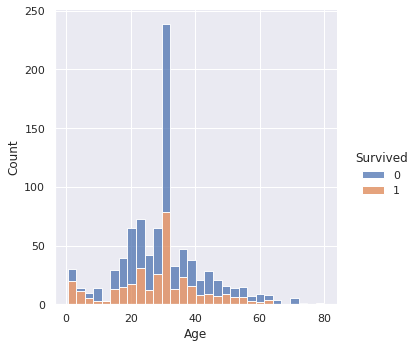

In [43]:
sns.displot(titanic, x="Age", hue= "Survived", multiple="stack")

**Findings :**
The passengers in the youngest age group are most likely to suvived, followed by the aga group between 40-60.
The passengers aged between 20 and 40 includes most survivors, while with lowest survival rate.
Age is an important factor to one's chance of survival.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [71]:
pd.pivot_table(titanic,['Survived'], ['SibSp','Parch'],aggfunc=np.mean)

Survived
SibSp Parch          
0     0      0.303538
      1      0.657895
      2      0.724138
      3      1.000000
      4      0.000000
      5      0.000000
1     0      0.520325
      1      0.596491
      2      0.631579
      3      0.333333
      4      0.000000
      5      0.333333
      6      0.000000
2     0      0.250000
      1      0.857143
      2      0.500000
      3      1.000000
3     0      1.000000
      1      0.000000
      2      0.285714
4     1      0.000000
      2      0.333333
5     2      0.000000
8     2      0.000000

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Survived,-0.005007,1.000000,0.247845,-0.005007,0.543351,0.037025,-0.136302,0.086210,-0.047298,0.191981,0.270495,0.106811
Pclass,0.018305,0.247845,1.000000,0.018305,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091
Name,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Sex,-0.042939,0.543351,0.118133,-0.042939,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569
Age,0.123648,0.037025,0.171190,0.123648,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308
SibSp,-0.031023,-0.136302,-0.149630,-0.031023,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683
Parch,0.001206,0.086210,-0.000343,0.001206,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059
Ticket,0.760875,-0.047298,0.020431,0.760875,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655
Fare,0.299982,0.191981,0.079498,0.299982,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726


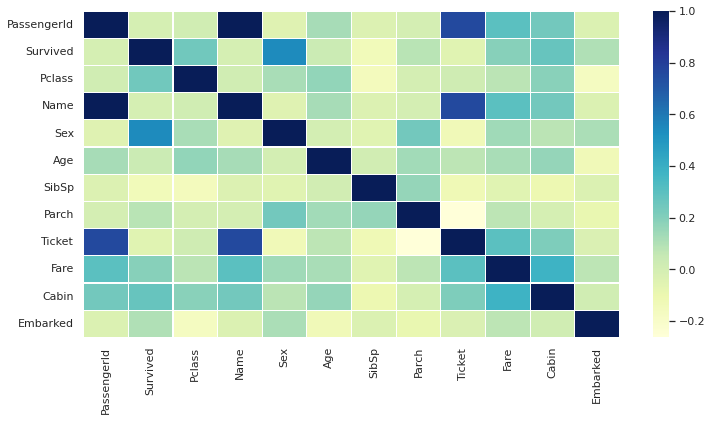

In [47]:
plt.figure(figsize=(12, 6))
corr = titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

**Findings:**
The top correlated features are Sex, Cabin, Pclass, Fare. This means that sex matters most in survival, and then seat position matters.

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

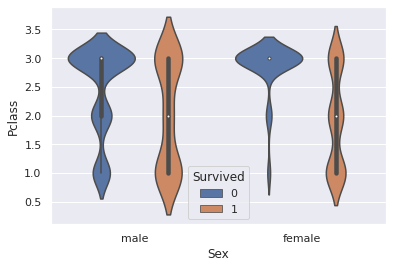

In [55]:
sns.violinplot(x = 'Sex', y = 'Pclass', hue = 'Survived', data=titanic)

**Findings:**
Overally, males and people in the lower levels are more unlikely to survive, and survivors amaong males are mainly those in the 1st and 3rd class. Compared to male's distrution, surviving females are relatively distributed in three class.

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [67]:
# train the linear regression model
import statsmodels.formula.api as sm
import statsmodels.api as sm2

model = sm.ols(formula="Survived ~ Pclass+Sex+Age+SibSp+Parch+Fare", data=titanic).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     96.16
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           5.59e-93
Time:                        03:24:04   Log-Likelihood:                -398.14
No. Observations:                 891   AIC:                             810.3
Df Residuals:                     884   BIC:                             843.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2994      0.070     18.557      

In [76]:
# predict and output results using the trained model and testset
titanic_test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
model.predict(titanic_test)

0      0.077768
1      0.473010
2      0.087078
3      0.122148
4      0.602057
         ...   
413         NaN
414    0.945490
415    0.054043
416         NaN
417         NaN
Length: 418, dtype: float64